# SETUP

Een code cel output alleen de laatste regel. Om meerdere regels te laten zien,  kun je de ast_node_interactivity eigenschap op 'all' zetten. Hierdoor worden alle outputs in een cel getoond.

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Data inladen

* Pandas importeren.
* CSV-bestand inlezen waarin de gegevens staan van verschillende laptops.

In [1]:
import pandas as pd

laptops = pd.read_csv('datasets/laptops.csv', sep=';', decimal=',')
laptops.head()
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpuGeneration  852 non-null    object 
 1   cpuType        853 non-null    object 
 2   RAM            855 non-null    float64
 3   diskspace      851 non-null    float64
 4   brand          856 non-null    object 
dtypes: float64(2), object(3)
memory usage: 33.6+ KB


In [2]:
laptops

,cpuGeneration,cpuType,RAM,diskspace,brand
0,Kabylake,i7,4.0,232.5,Toshiba
1,Kabylake,i5,2.0,992.5,Acer
2,Haswell,i7,16.0,495.6,Dell
3,Skylake,i7,4.0,217.2,Toshiba
4,Broadwell,i5,4.0,245.8,Acer
...,...,...,...,...,...
852,Broadwell,i3,4.0,NaN,Asus
853,Broadwell,i5,4.0,235.6,HP
854,Sandy Bridge,i5,4.0,226.6,Asus
855,Skylake,i7,8.0,221.8,Toshiba


Voor ordinale gegevens kunnen we de volgorde van de categorieën vastleggen

In [4]:
cpuGenerationLevels = ["Sandy Bridge", "Ivy Bridge", "Haswell", "Broadwell", "Skylake", "Kabylake"]
laptops.cpuGeneration = pd.Categorical(laptops.cpuGeneration, ordered=True, categories=cpuGenerationLevels)

cpuTypeLevels = ["i3", "i5", "i7"]
laptops.cpuType = pd.Categorical(laptops.cpuType, ordered=True, categories=cpuTypeLevels)
laptops.dtypes

cpuGeneration    category
cpuType          category
RAM               float64
diskspace         float64
brand              object
dtype: object

In [5]:
laptops

,cpuGeneration,cpuType,RAM,diskspace,brand
0,Kabylake,i7,4.0,232.5,Toshiba
1,Kabylake,i5,2.0,992.5,Acer
2,Haswell,i7,16.0,495.6,Dell
3,Skylake,i7,4.0,217.2,Toshiba
4,Broadwell,i5,4.0,245.8,Acer
...,...,...,...,...,...
852,Broadwell,i3,4.0,NaN,Asus
853,Broadwell,i5,4.0,235.6,HP
854,Sandy Bridge,i5,4.0,226.6,Asus
855,Skylake,i7,8.0,221.8,Toshiba


# Frequenties


## Absolute frequenties
Op deze manier krijg je een Pandas `Series` terug

In [5]:
laptops.cpuType.value_counts()

i5    556
i3    213
i7     84
Name: cpuType, dtype: int64

In [6]:
absoluteFrequenties = laptops.cpuType.value_counts()

We zien nu echter dat de som van deze 3 getallen kleiner is...

In [7]:
absoluteFrequenties.sum()

853

...dan het aantal lijnen in onze oorspronkelijke dataframe

In [8]:
len(laptops)

857

Dit komt omdat er 4 rijen zijn waar in de kolom cpuType waar in NaN staat

In [9]:
laptops[laptops.cpuType.isnull()]

,cpuGeneration,cpuType,RAM,diskspace,brand
353,Ivy Bridge,NaN,8.0,222.9,HP
604,Broadwell,NaN,1.0,239.1,Acer
611,Kabylake,NaN,4.0,502.7,HP
649,Skylake,NaN,4.0,482.7,HP


Om de `NaN` toch mee te tellen

In [10]:
laptops.cpuType.value_counts(dropna=False)

i5     556
i3     213
i7      84
NaN      4
Name: cpuType, dtype: int64

Sorteren gebeurt standaard op de gevonden frequentie. De `ascending` parameter kan je gebruiken om de sortering om te draaien.

In [11]:
laptops.cpuType.value_counts(ascending=True)

i7     84
i3    213
i5    556
Name: cpuType, dtype: int64

Wil je sorteren op de inhoud van de index gebruik dan `sort_index()`. Dit is nuttig bij ordinale meetniveaus

In [12]:
laptops.cpuType.value_counts().sort_index()

i3    213
i5    556
i7     84
Name: cpuType, dtype: int64

### Klassen

De `diskspace` kolom bevat de opslagcapaciteit van de laptops. Deze kolom bevat echter te veel verschillende waarden om een histogram te maken.  Wanneer er te veel verschillende waarden zijn, kan het handig zijn om de waarden in klassen te verdelen. Dit kan met behulp van `cut()`

In [13]:
laptops.diskspace.value_counts()

510.6     5
488.9     4
482.9     4
494.1     4
231.3     4
         ..
493.6     1
996.7     1
482.6     1
1003.6    1
234.0     1
Name: diskspace, Length: 592, dtype: int64

We maken bijvoorbeeld klassen aan met een range die 100 eenheden groot is en categoriseren onze waarnemingen in die klassen

In [14]:
cutpoints = range(0, 1200, 100)
klassen = pd.cut(laptops.diskspace, bins=cutpoints)
pd.DataFrame(klassen)

,diskspace
0,"(200.0, 300.0]"
1,"(900.0, 1000.0]"
2,"(400.0, 500.0]"
3,"(200.0, 300.0]"
4,"(200.0, 300.0]"
...,...
852,NaN
853,"(200.0, 300.0]"
854,"(200.0, 300.0]"
855,"(200.0, 300.0]"


We kunnen nu de absolute frequenties berekenen van de voorkomens van de waarnemingen in de klassen.

In [15]:
klassen.value_counts().sort_index()

(0, 100]         29
(100, 200]       52
(200, 300]      407
(300, 400]        0
(400, 500]      227
(500, 600]       96
(600, 700]        0
(700, 800]        0
(800, 900]        0
(900, 1000]      19
(1000, 1100]     21
Name: diskspace, dtype: int64

#### Tweaken van de klasse-intervallen
Inclusiviteit/exclusiviteit intervallen omdraaien



In [30]:
klassen = pd.cut(laptops.diskspace, bins=cutpoints, right=False)
pd.DataFrame(klassen)

,diskspace
0,"[200.0, 300.0)"
1,"[900.0, 1000.0)"
2,"[400.0, 500.0)"
3,"[200.0, 300.0)"
4,"[200.0, 300.0)"
...,...
852,NaN
853,"[200.0, 300.0)"
854,"[200.0, 300.0)"
855,"[200.0, 300.0)"


#### Aantal intervallen berekenen
*  met Sturges $k = 1 + \log_2(n)$

In [31]:
diskspace = laptops.diskspace.dropna()
n = len(diskspace)
import math

math.ceil(1 + math.log2(n))

11

* met Scott $k = 3.5 \cdot \sigma / \sqrt[3]{n}$

In [32]:
import statistics as stat

b = 3.5 * stat.stdev(diskspace) / (n ** (1 / 3))
math.ceil((diskspace.max() - diskspace.min()) / b)

13

* met Excel $k = \lceil{\sqrt{n}}\rceil$

In [19]:
math.ceil(math.sqrt(n))

30

#### Intervalgrenzen automatisch laten bepalen

In [33]:
diskspace.value_counts(bins=11).sort_index()

(87.363, 173.345]      81
(173.345, 258.391]    407
(258.391, 343.436]      0
(343.436, 428.482]      0
(428.482, 513.527]    323
(513.527, 598.573]      0
(598.573, 683.618]      0
(683.618, 768.664]      0
(768.664, 853.709]      0
(853.709, 938.755]      0
(938.755, 1023.8]      40
Name: diskspace, dtype: int64

## Relatieve frequenties

Met behulp van `value_counts()` kan je relatieve frequenties berekenen door de parameter `normalize` op `True` te zetten.

In [21]:
laptops.brand.value_counts(normalize=True)

HP         0.227804
Dell       0.188084
Toshiba    0.151869
Acer       0.151869
Lenovo     0.091121
Asus       0.075935
Apple      0.075935
Medion     0.037383
Name: brand, dtype: float64

Wens je dit in procenten te zien, dan kan je de parameter `normalize` op `True` zetten en vermenigvuldg je het resultaat met 100. Je kan ook nog afronden met `round()`.

In [22]:
(laptops.brand.value_counts(normalize=True) * 100).round(1)

HP         22.8
Dell       18.8
Toshiba    15.2
Acer       15.2
Lenovo      9.1
Asus        7.6
Apple       7.6
Medion      3.7
Name: brand, dtype: float64

In [23]:
laptops.brand.value_counts(normalize=True).sum()

1.0

In [24]:
(laptops.brand.value_counts(normalize=True) * 100).round(1).sum()

100.0

## Cumulatieve frequenties

In [25]:
laptops.cpuGeneration.value_counts().sort_index().cumsum()

Sandy Bridge     63
Ivy Bridge      170
Haswell         336
Broadwell       554
Skylake         709
Kabylake        852
Name: cpuGeneration, dtype: int64

We kunnen op analoge manier ook berekenen hoeveel laptops een bepaalde CPU generation OF BETER heeft

In [26]:
laptops.cpuGeneration.value_counts().sort_index(ascending=False).cumsum()

Kabylake        143
Skylake         298
Broadwell       516
Haswell         682
Ivy Bridge      789
Sandy Bridge    852
Name: cpuGeneration, dtype: int64

## Cumulatieve percentages

In [27]:
(laptops.cpuGeneration.value_counts(normalize=True).sort_index().cumsum() * 100).round(1)

Sandy Bridge      7.4
Ivy Bridge       20.0
Haswell          39.4
Broadwell        65.0
Skylake          83.2
Kabylake        100.0
Name: cpuGeneration, dtype: float64

Of om te bekomen welk percentage een bepaalde CPU generation heeft OF BETER

In [28]:
(laptops.cpuGeneration.value_counts(normalize=True).sort_index(ascending=False).cumsum() * 100).round(1)

Kabylake         16.8
Skylake          35.0
Broadwell        60.6
Haswell          80.0
Ivy Bridge       92.6
Sandy Bridge    100.0
Name: cpuGeneration, dtype: float64

# Grafieken

Om grafieken te kunnen maken, moeten we eerst een nieuwe library installeren. Dit doen we met de volgende code:

```bash
pip install matplotlib
```

Matplotlib is een zeer uitgebreide library om grafieken te maken. We zullen hier enkel de basisfuncties gebruiken.

*<font color="red">
Nota: mijn Jupyter Notebooks zijn geconfigureerd om alle output in een code cel te tonen en niet alleen het laatste statement.
Daarom moet ik soms tussentijdse resultaten "inslikken" met de constructie `_ = ax.` waarbij ik het resultaat stokeer in een naamloze variabele waardoor die niet geprint wordt.</font>*

## Lijngrafiek

In [34]:
import matplotlib.pyplot as plt  # eenmaal importeren is voldoende

fig, ax = plt.subplots()
_ = ax.plot([1, 2, 3, 4], [0, 4, 6, 7])
_ = ax.set_xlabel('tijd (seconden)')
_ = ax.set_ylabel('temperatuur (Kelvin)')
_ = ax.set_title('Temperatuurverloop')
_ = ax.grid(linestyle='--')

ModuleNotFoundError: No module named 'matplotlib'

## Taartdiagram

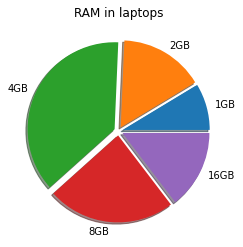

In [ ]:
import matplotlib.pyplot as plt  # eenmaal importeren is voldoende
import numpy as np

x = laptops.RAM.value_counts().sort_index()
labels = ['1GB', '2GB', '4GB', '8GB', '16GB']
explode = np.full(len(labels), 0.05)

fig, ax = plt.subplots()
_ = ax.pie(x, labels=labels, explode=explode, shadow=True)
_ = ax.set_title('RAM in laptops')

## Staafdiagrammen en histogrammen

### Staafdiagram

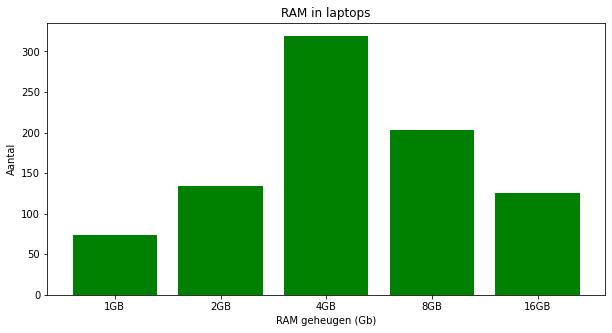

In [ ]:
import matplotlib.pyplot as plt  # eenmaal importeren is voldoende

x = laptops.RAM.value_counts().sort_index()
labels = ['1GB', '2GB', '4GB', '8GB', '16GB']

fig, ax = plt.subplots(figsize=(10, 5))

_ = ax.bar(x=labels, height=x, color='green')
_ = ax.set_title('RAM in laptops')
_ = ax.set_xlabel('RAM geheugen (Gb)')
_ = ax.set_ylabel('Aantal')

### Histogrammen

Klassen automatisch laten berekenen

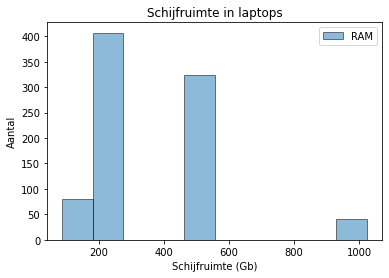

In [ ]:
import matplotlib.pyplot as plt  # eenmaal importeren is voldoende

fig, axes = plt.subplots()

_ = axes.hist(laptops.diskspace, edgecolor='black', alpha=0.5, label='RAM')
_ = axes.set_title('Schijfruimte in laptops')
_ = axes.set_xlabel('Schijfruimte (Gb)')
_ = axes.set_ylabel('Aantal')
_ = axes.legend()

Klassen zelf opgeven

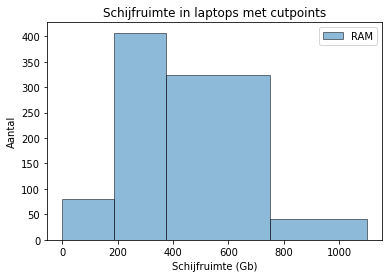

In [ ]:
fig, axes = plt.subplots()
cutpoints = [0, 185, 375, 750, 1100]

_ = axes.hist(laptops.diskspace, bins=cutpoints, edgecolor='black', alpha=0.5, label='RAM')
_ = axes.set_title('Schijfruimte in laptops met cutpoints')
_ = axes.set_xlabel('Schijfruimte (Gb)')
_ = axes.set_ylabel('Aantal')
_ = axes.legend()

Histogrammen vertrekkende van Pandas (gebruikt Matplotlib achter de schermen)

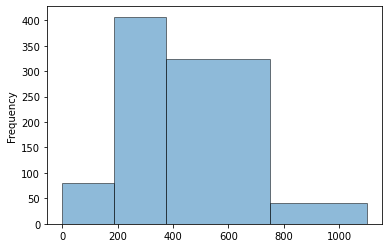

In [ ]:
_ = laptops.diskspace.plot.hist(bins=cutpoints, edgecolor='black', alpha=0.5)


Histogrammen vertrekkende van Pandas in Matplotlib

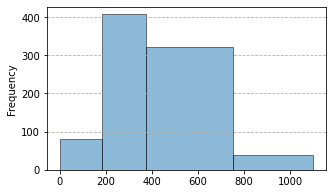

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
_ = laptops.diskspace.plot.hist(bins=cutpoints, edgecolor='black', alpha=0.5, ax=ax)
_ = ax.grid(linestyle='--', axis='y')


## Demonstratie van meerdere subplots in één figure

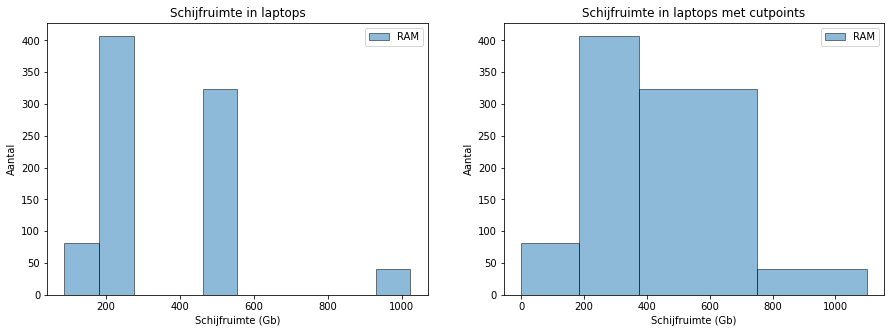

In [ ]:
import matplotlib.pyplot as plt  # eenmaal importeren is voldoende

# hier maken we twee grafieken in één plot (2 rijen en 1 kolommen).
# axes is dan een array, maar dit kan ook een 2D-matrix zijn, bv. bij 2x3

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

_ = axes[0].hist(laptops.diskspace, edgecolor='black', alpha=0.5, label='RAM')
_ = axes[0].set_title('Schijfruimte in laptops')
_ = axes[0].set_xlabel('Schijfruimte (Gb)')
_ = axes[0].set_ylabel('Aantal')
_ = axes[0].legend()

cutpoints = [0, 185, 375, 750, 1100]

_ = axes[1].hist(laptops.diskspace, bins=cutpoints, edgecolor='black', alpha=0.5, label='RAM')
_ = axes[1].set_title('Schijfruimte in laptops met cutpoints')
_ = axes[1].set_xlabel('Schijfruimte (Gb)')
_ = axes[1].set_ylabel('Aantal')
_ = axes[1].legend()

## Extra's

<font color='red'>*Volgende grafieken zijn er louter informatief. Je mag ze altijd een keertje testen of gebruiken in een oefening. Sommige worden wel vaak gebruikt binnen Data Science toepassing en zijn bovendien zeer leerrijk*</font>

### Spiderplot

In [ ]:
import math

brand_percentages = laptops.brand.value_counts() / laptops.brand.value_counts().max()
RAM_percentages = laptops.groupby(by='brand')['RAM'].mean() / laptops.groupby(by='brand')['RAM'].mean().max()

categories = brand_percentages.index
brand_values = brand_percentages.to_list()
diskspace_values = RAM_percentages.to_list()

N = len(categories)
M = max(brand_values)
# hoeken berekenen waaronder de spaken zullen staan
angles = [n / float(N) * 2 * math.pi for n in range(N)]

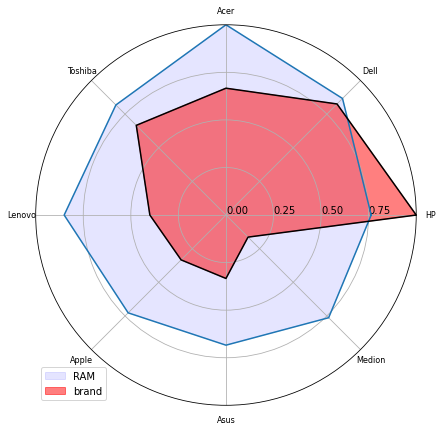

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={'projection': 'polar'})

# spakenwiel maken
_ = ax.set_rticks(angles)
_ = ax.set_rlabel_position(0)
_ = ax.set_xticks(angles)
_ = ax.set_xticklabels(categories, size=8)
_ = ax.set_yticks([n / 4 * M for n in range(4)])
_ = ax.set_ylim(0, M)

# radars tekenen.
# om de plot te sluiten moeten, voegen we beginwaarden toe aan het einde.
_ = ax.plot(angles + angles[:1], diskspace_values + diskspace_values[:1], linewidth=1.5, linestyle='solid')
_ = ax.fill(angles, diskspace_values, color='blue', alpha=0.1, label='RAM')
_ = ax.plot(angles + angles[:1], brand_values + brand_values[:1], color='black', linewidth=1.5, linestyle='solid')
_ = ax.fill(angles, brand_values, color='red', alpha=0.5, label='brand')
_ = ax.legend()

### Treemap

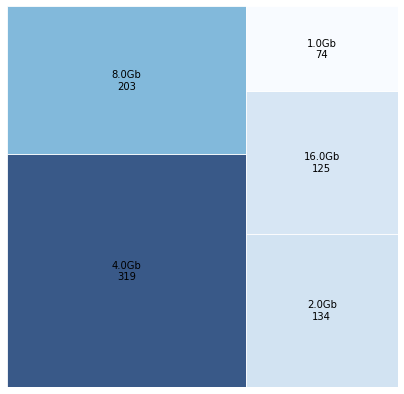

In [ ]:
import squarify  # pip install squarify
import matplotlib

aantallen = laptops.RAM.value_counts()
# kleurenmap maken.
cmap = matplotlib.cm.Blues
mini = min(aantallen)
maxi = max(aantallen)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in aantallen]

labels = ['{}Gb\n{}'.format(label, count) for label, count in zip(aantallen.index, aantallen)]

fig, ax = plt.subplots(figsize=(7, 7))
_ = squarify.plot(sizes=aantallen, alpha=0.8, edgecolor='white', color=colors, label=labels, ax=ax)
_ = ax.axis('off')

### Word Cloud

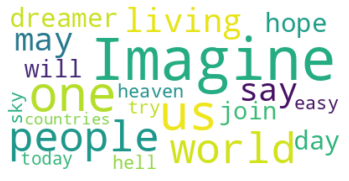

In [ ]:
import wordcloud as wc

tekst = '''
Imagine there's no heaven
It's easy if you try
No hell below us
Above us only sky
Imagine all the people living for today
Imagine there's no countries
It isn't hard to do
Nothing to kill or die for
And no religion too
Imagine all the people living life in peace, you
You may say I'm a dreamer
But I'm not the only one
I hope some day you'll join us
And the world will be as one
Imagine no possessions
I wonder if you can
No need for greed or hunger
A brotherhood of man
Imagine all the people sharing all the world, you
You may say I'm a dreamer
But I'm not the only one
I hope some day you'll join us
And the world will be as one
'''
cloud = wc.WordCloud(max_font_size=70, max_words=20, background_color='white').generate(tekst)
fig, ax = plt.subplots()
_ = ax.imshow(cloud, interpolation='bilinear')
_ = ax.axis('off')
